# Sahayog Sync – AI-driven Mutual Aid Allocation (MVP Demo)

This demo shows how an AI system models village kinship networks
and allocates resources fairly during a flood scenario.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import matplotlib.pyplot as plt

In [2]:
households = pd.read_csv("../ml-python/data/processed/households_processed.csv")
edges = pd.read_csv("../ml-python/data/processed/edges_processed.csv")

with open("../ml-python/data/processed/flood_scenario_processed.json") as f:
    flood = json.load(f)

alloc_df = pd.read_csv("../outputs/allocations/allocations_demo.csv")

In [3]:
G = nx.Graph()

for _, row in households.iterrows():
    G.add_node(row['id'], **row.to_dict())

for _, row in edges.iterrows():
    G.add_edge(
        row['from_id'],
        row['to_id'],
        tie_strength=row['tie_strength'],
        physical_proximity=row['physical_proximity']
    )

In [4]:
for h in flood['affected_households']:
    G.nodes[h['id']]['affected'] = 1
    G.nodes[h['id']]['severity'] = h['severity']

In [5]:
alloc_df.head()

,to,food_allocated,food_from,food_tie_strength,water_allocated,water_from,water_tie_strength,shelter_allocated,shelter_from,shelter_tie_strength,medicine_allocated,medicine_from,medicine_tie_strength
0,H3,1,H169,0.816667,1,H169,0.816667,0,NaN,NaN,1,H169,0.816667
1,H10,1,H377,0.816667,1,H377,0.816667,0,NaN,NaN,1,H275,0.800000
2,H11,1,H713,0.983333,1,H713,0.983333,0,NaN,NaN,1,H276,0.683333
3,H57,1,H847,0.900000,1,H847,0.900000,1,H217,0.766667,0,NaN,NaN
4,H60,1,H554,0.916667,1,H554,0.916667,0,NaN,NaN,0,NaN,NaN


In [6]:
affected = [n for n, d in G.nodes(data=True) if d['affected'] == 1]
covered = alloc_df['to'].unique()

print(f"Affected households: {len(affected)}")
print(f"Covered households: {len(covered)}")
print(f"Coverage ratio: {len(covered)/len(affected):.2f}")

Affected households: 100
Covered households: 100
Coverage ratio: 1.00


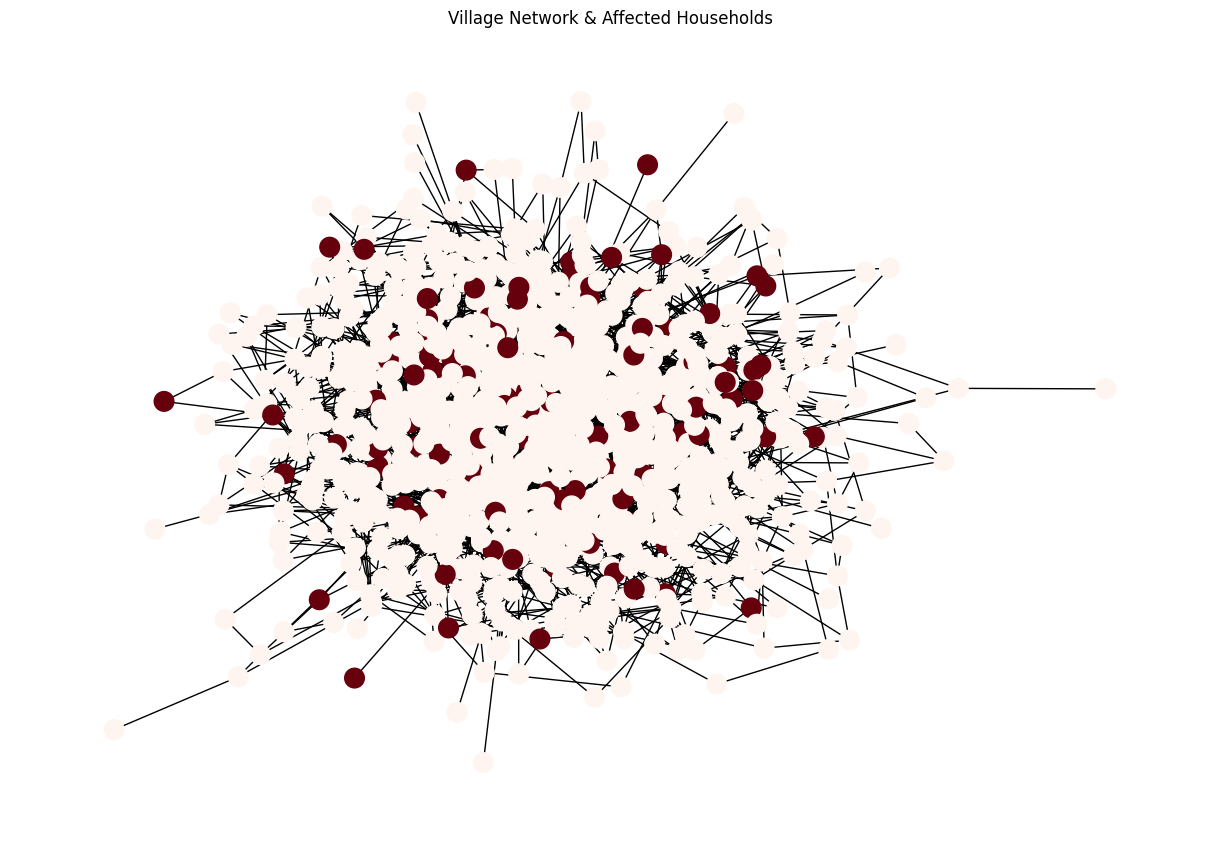

In [7]:
plt.figure(figsize=(12,8))
nx.draw(
    G,
    node_size=200,
    node_color=[G.nodes[n]['affected'] for n in G.nodes()],
    cmap=plt.cm.Reds,
    with_labels=False
)
# plt.savefig("../outputs/visualizations/allocation_graph.png")
plt.title("Village Network & Affected Households")
plt.show()

In [8]:
alloc_df.to_csv("../outputs/allocations/allocations_demo.csv", index=False)